In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('data/train.csv', parse_dates = True)
test = pd.read_csv('data/test.csv', parse_dates = True)
data_dict = pd.read_excel('data/Data_Dictionary.xlsx')

In [3]:
data_dict

,Variable,Description
0,reservation_id,Reservation ID
1,booking_date,Date of booking
2,checkin_date,Checkin date recorded at the time of booking
3,checkout_date,Checkout date recorded at the time of booking
4,channel_code,Different channels of booking
5,main_product_code,Type of product a member has purchased
6,numberofadults,Number of adults travelling
7,numberofchildren,Number of children travelling
8,persontravellingid,Type of person travelling
9,resort_region_code,Resort Region


Descriptions of each variable.

# Problem Statement

Club Mahindra (Club M) makes significant revenue from Food and Beverages (F&B) sales in their resorts. The members of Club M are offered a wide variety of items in either buffet or À la carte form. Following are some benefits that the model to predict the spend by a member in their next visit to a resort will bring:

    Predicting the F&B spend of a member in a resort would help in improving the pre-sales during resort booking through web and mobile app
    Targeted campaigns to suit the member taste and preference of F&B
    Providing members in the resort with a customized experience and offers
    Help resort kitchen to plan the inventory and food quantity to be prepared in advance

Given the information related to resort, club member, reservation etc. the task is to predict average spend per room night on food and beverages for the each reservation in the test set.

In [4]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [5]:
train.shape

(341424, 24)

In [6]:
test.shape

(146765, 23)

## Handling Null Values

In [7]:
train.isnull().sum() / train.shape[0]

reservation_id                        0.000000
booking_date                          0.000000
checkin_date                          0.000000
checkout_date                         0.000000
channel_code                          0.000000
main_product_code                     0.000000
numberofadults                        0.000000
numberofchildren                      0.000000
persontravellingid                    0.000000
resort_region_code                    0.000000
resort_type_code                      0.000000
room_type_booked_code                 0.000000
roomnights                            0.000000
season_holidayed_code                 0.000334
state_code_residence                  0.013953
state_code_resort                     0.000000
total_pax                             0.000000
member_age_buckets                    0.000000
booking_type_code                     0.000000
memberid                              0.000000
cluster_code                          0.000000
reservationst

In [8]:
test.isnull().sum() / test.shape[0]

reservation_id              0.000000
booking_date                0.000000
checkin_date                0.000000
checkout_date               0.000000
channel_code                0.000000
main_product_code           0.000000
numberofadults              0.000000
numberofchildren            0.000000
persontravellingid          0.000000
resort_region_code          0.000000
resort_type_code            0.000000
room_type_booked_code       0.000000
roomnights                  0.000000
season_holidayed_code       0.000238
state_code_residence        0.015399
state_code_resort           0.000000
total_pax                   0.000000
member_age_buckets          0.000000
booking_type_code           0.000000
memberid                    0.000000
cluster_code                0.000000
reservationstatusid_code    0.000000
resort_id                   0.000000
dtype: float64

So we have a very insignificant number of null values in both cases.

In [9]:
train[train['season_holidayed_code'].isnull() == True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 296 to 250575
Data columns (total 24 columns):
reservation_id                        114 non-null object
booking_date                          114 non-null object
checkin_date                          114 non-null object
checkout_date                         114 non-null object
channel_code                          114 non-null int64
main_product_code                     114 non-null int64
numberofadults                        114 non-null int64
numberofchildren                      114 non-null int64
persontravellingid                    114 non-null int64
resort_region_code                    114 non-null int64
resort_type_code                      114 non-null int64
room_type_booked_code                 114 non-null int64
roomnights                            114 non-null int64
season_holidayed_code                 0 non-null float64
state_code_residence                  114 non-null float64
state_code_resort            

In [10]:
test[test['season_holidayed_code'].isnull() == True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1422 to 108019
Data columns (total 23 columns):
reservation_id              35 non-null object
booking_date                35 non-null object
checkin_date                35 non-null object
checkout_date               35 non-null object
channel_code                35 non-null int64
main_product_code           35 non-null int64
numberofadults              35 non-null int64
numberofchildren            35 non-null int64
persontravellingid          35 non-null int64
resort_region_code          35 non-null int64
resort_type_code            35 non-null int64
room_type_booked_code       35 non-null int64
roomnights                  35 non-null int64
season_holidayed_code       0 non-null float64
state_code_residence        35 non-null float64
state_code_resort           35 non-null int64
total_pax                   35 non-null int64
member_age_buckets          35 non-null object
booking_type_code           35 non-null int64
memberid

In [11]:
train[train['state_code_residence'].isnull() == True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4764 entries, 191 to 341312
Data columns (total 24 columns):
reservation_id                        4764 non-null object
booking_date                          4764 non-null object
checkin_date                          4764 non-null object
checkout_date                         4764 non-null object
channel_code                          4764 non-null int64
main_product_code                     4764 non-null int64
numberofadults                        4764 non-null int64
numberofchildren                      4764 non-null int64
persontravellingid                    4764 non-null int64
resort_region_code                    4764 non-null int64
resort_type_code                      4764 non-null int64
room_type_booked_code                 4764 non-null int64
roomnights                            4764 non-null int64
season_holidayed_code                 4764 non-null float64
state_code_residence                  0 non-null float64
state_code_res

In [12]:
test[test['state_code_residence'].isnull() == True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 7 to 146647
Data columns (total 23 columns):
reservation_id              2260 non-null object
booking_date                2260 non-null object
checkin_date                2260 non-null object
checkout_date               2260 non-null object
channel_code                2260 non-null int64
main_product_code           2260 non-null int64
numberofadults              2260 non-null int64
numberofchildren            2260 non-null int64
persontravellingid          2260 non-null int64
resort_region_code          2260 non-null int64
resort_type_code            2260 non-null int64
room_type_booked_code       2260 non-null int64
roomnights                  2260 non-null int64
season_holidayed_code       2260 non-null float64
state_code_residence        0 non-null float64
state_code_resort           2260 non-null int64
total_pax                   2260 non-null int64
member_age_buckets          2260 non-null object
booking_type_code    

In [13]:
train['season_holidayed_code'].value_counts()

2.0    126771
3.0    118187
4.0     69387
1.0     26965
Name: season_holidayed_code, dtype: int64

In [14]:
train['state_code_residence'].value_counts()

8.0     134919
2.0      41143
1.0      28040
7.0      25873
5.0      21051
4.0      15938
9.0      12291
15.0      9490
10.0      9356
6.0       6384
12.0      6092
3.0       3943
23.0      3835
14.0      3132
16.0      2371
13.0      1771
21.0      1694
20.0      1470
18.0      1429
19.0      1085
26.0      1068
25.0       840
27.0       790
11.0       713
28.0       541
22.0       432
24.0       382
30.0       144
29.0       101
33.0        88
31.0        60
37.0        59
32.0        53
34.0        48
35.0        16
36.0        12
38.0         6
Name: state_code_residence, dtype: int64

There's no intersection between the null values either. Just going to use a standard fillna cause no time.

In [15]:
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)

In [16]:
train.isnull().sum() + test.isnull().sum()

amount_spent_per_room_night_scaled    NaN
booking_date                          0.0
booking_type_code                     0.0
channel_code                          0.0
checkin_date                          0.0
checkout_date                         0.0
cluster_code                          0.0
main_product_code                     0.0
member_age_buckets                    0.0
memberid                              0.0
numberofadults                        0.0
numberofchildren                      0.0
persontravellingid                    0.0
reservation_id                        0.0
reservationstatusid_code              0.0
resort_id                             0.0
resort_region_code                    0.0
resort_type_code                      0.0
room_type_booked_code                 0.0
roomnights                            0.0
season_holidayed_code                 0.0
state_code_residence                  0.0
state_code_resort                     0.0
total_pax                         

In [17]:
train.shape

(341424, 24)

In [18]:
test.shape

(146765, 23)

## Analysis

### Booking Date

So I think we can drop this as well as it really should not have any impact on the amount spent during the stay.

In [19]:
train.drop(['booking_date'], axis = 1, inplace = True)
test.drop(['booking_date'], axis = 1, inplace = True)

### Checkin & Checkout Date

We can simply convert this into the number of days they stayed at the resort.

In [20]:
train.head()

,reservation_id,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,06/04/18,3,1,2,0,46,3,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,11/04/15,16/04/15,1,1,2,0,46,3,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,01/02/15,05/02/15,1,1,2,0,47,1,5,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,11/06/15,16/06/15,1,1,2,2,46,2,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,14/12/15,19/12/15,1,1,2,0,46,2,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [21]:
train['checkin_date'] = pd.to_datetime(train['checkin_date'], errors = 'coerce', dayfirst = True)
train['checkout_date'] = pd.to_datetime(train['checkout_date'], errors = 'coerce', dayfirst = True)
test['checkin_date'] = pd.to_datetime(test['checkin_date'], errors = 'coerce', dayfirst = True)
test['checkout_date'] = pd.to_datetime(test['checkout_date'], errors = 'coerce', dayfirst = True)

In [22]:
train.iloc[0]['checkout_date'] - train.iloc[0]['checkin_date']

Timedelta('1 days 00:00:00')

In [23]:
train['days_stayed'] = train['checkout_date'] - train['checkin_date']
test['days_stayed'] = test['checkout_date'] - test['checkin_date']

In [24]:
train['days_stayed'] = train['days_stayed'].astype('timedelta64[D]')
test['days_stayed'] = test['days_stayed'].astype('timedelta64[D]')

In [25]:
train['days_stayed'] = train['days_stayed'].astype('int64')
test['days_stayed'] = test['days_stayed'].astype('int64')

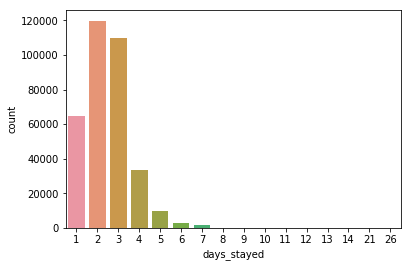

In [26]:
sns.countplot(train['days_stayed'])

Tada! So now we can drop the checkin and checkout date.



In [27]:
train.drop(['checkin_date'], axis = 1, inplace = True)
test.drop(['checkin_date'], axis = 1, inplace = True)
train.drop(['checkout_date'], axis = 1, inplace = True)
test.drop(['checkout_date'], axis = 1, inplace = True)

### Channel Code

Text(0.5, 1.0, 'Test Set')

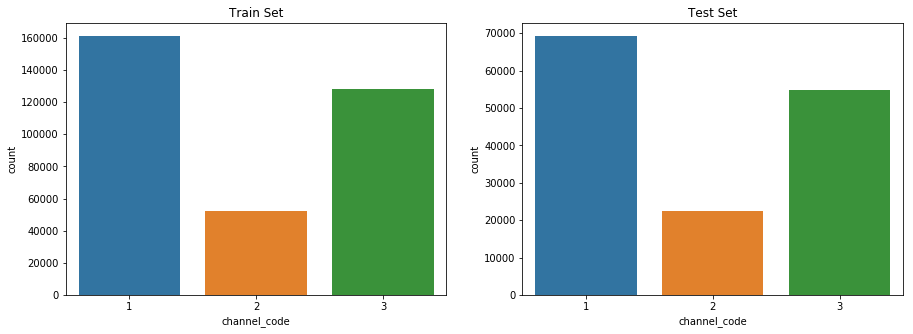

In [28]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['channel_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['channel_code'])
plt.title('Test Set')

Looks fine to me. Just LabelEncoding.

In [29]:
le = LabelEncoder()
le.fit(train['channel_code'])
for attribute in test['channel_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['channel_code'] = le.transform(train['channel_code'])
test['channel_code'] = le.transform(test['channel_code'])

Text(0.5, 1.0, 'Test Set')

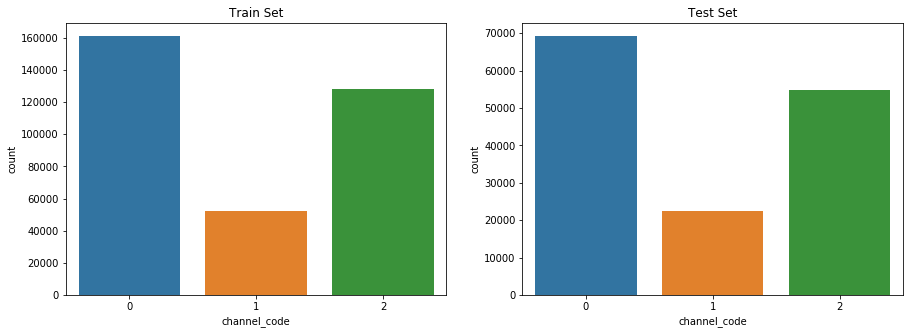

In [30]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['channel_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['channel_code'])
plt.title('Test Set')

### Main Product Code

Text(0.5, 1.0, 'Test Set')

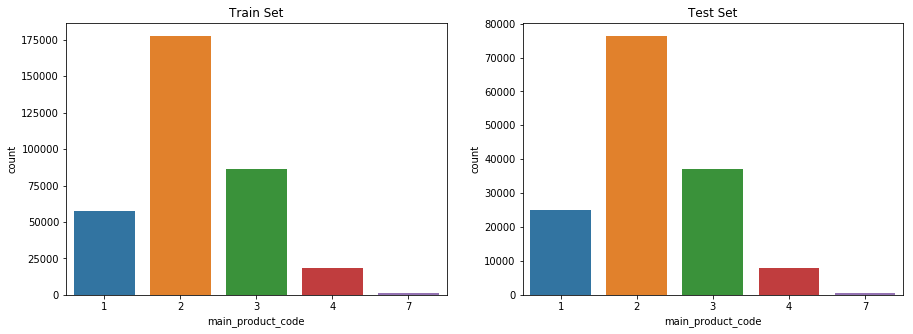

In [31]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['main_product_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['main_product_code'])
plt.title('Test Set')

Looks fine to me. Just need to use the LabelEncoder here.

In [32]:
le = LabelEncoder()
le.fit(train['main_product_code'])
for attribute in test['main_product_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['main_product_code'] = le.transform(train['main_product_code'])
test['main_product_code'] = le.transform(test['main_product_code'])

Text(0.5, 1.0, 'Test Set')

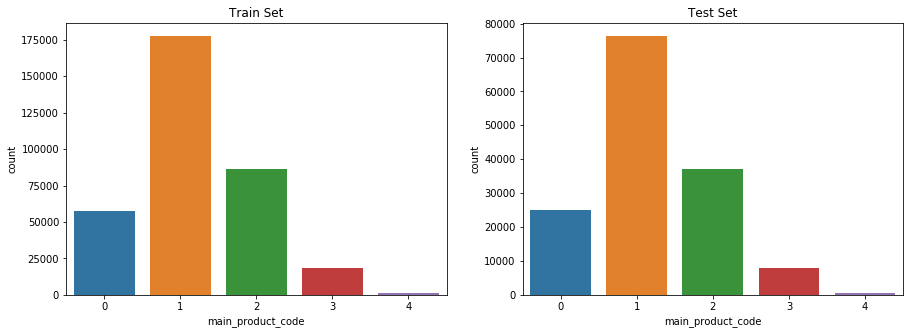

In [33]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['main_product_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['main_product_code'])
plt.title('Test Set')

### Number of Adults & Children

Text(0.5, 1.0, 'Test Set')

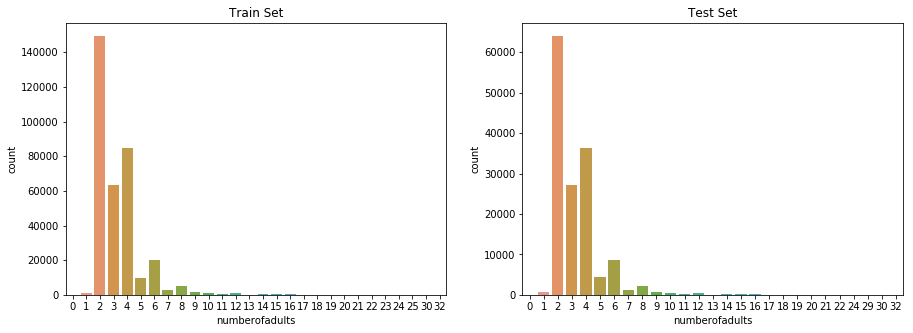

In [34]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['numberofadults'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['numberofadults'])
plt.title('Test Set')

Text(0.5, 1.0, 'Test Set')

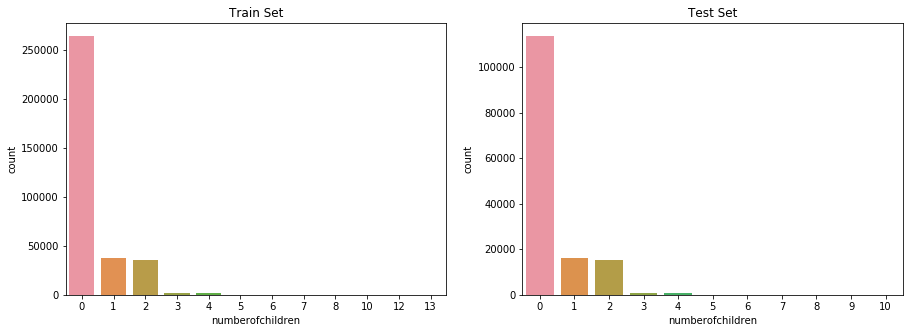

In [35]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['numberofchildren'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['numberofchildren'])
plt.title('Test Set')

Seems fine as well.

### Total Pax

Text(0.5, 1.0, 'Test Set')

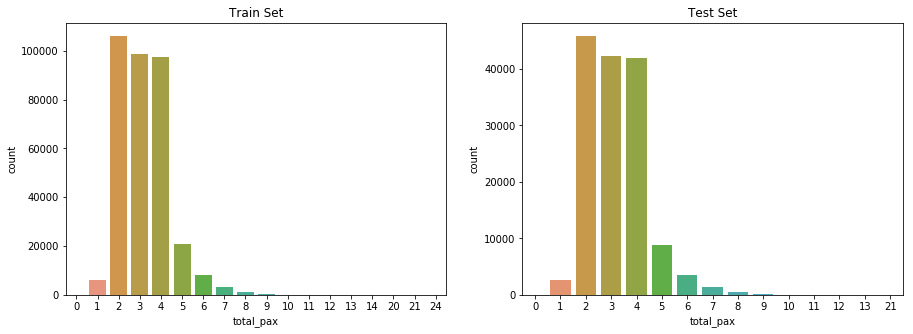

In [36]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['total_pax'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['total_pax'])
plt.title('Test Set')

Fine as well.

### Person Travelling ID

Text(0.5, 1.0, 'Test Set')

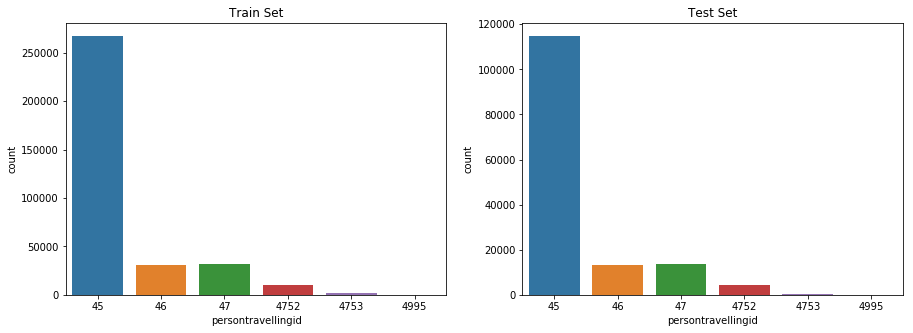

In [37]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['persontravellingid'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['persontravellingid'])
plt.title('Test Set')

Since it's categorical, I'll Label Encode. But looks fine otherwise. The very low count for 4995 might be an issue though.

In [38]:
le = LabelEncoder()
le.fit(train['persontravellingid'])
for attribute in test['persontravellingid'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['persontravellingid'] = le.transform(train['persontravellingid'])
test['persontravellingid'] = le.transform(test['persontravellingid'])

Text(0.5, 1.0, 'Test Set')

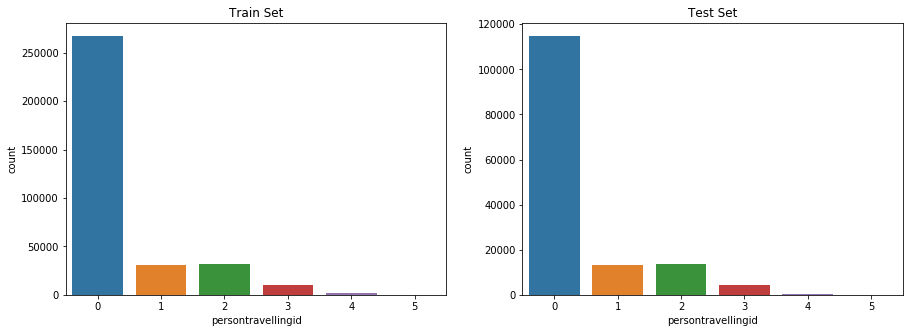

In [39]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['persontravellingid'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['persontravellingid'])
plt.title('Test Set')

### Resort Region Code

Text(0.5, 1.0, 'Test Set')

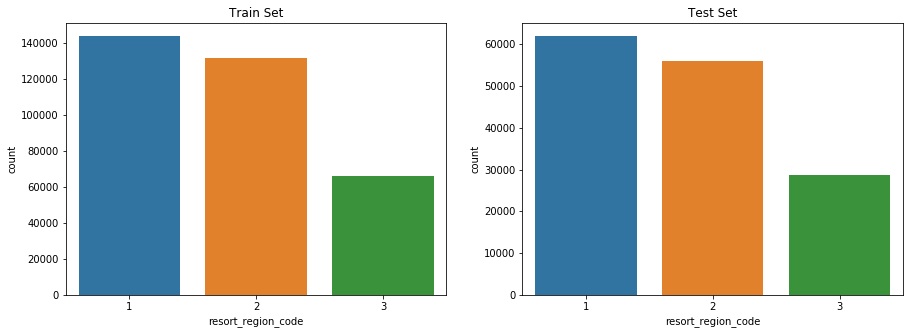

In [40]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['resort_region_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['resort_region_code'])
plt.title('Test Set')

Same as before, just LabelEncoding.

In [41]:
le = LabelEncoder()
le.fit(train['resort_region_code'])
for attribute in test['resort_region_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['resort_region_code'] = le.transform(train['resort_region_code'])
test['resort_region_code'] = le.transform(test['resort_region_code'])

Text(0.5, 1.0, 'Test Set')

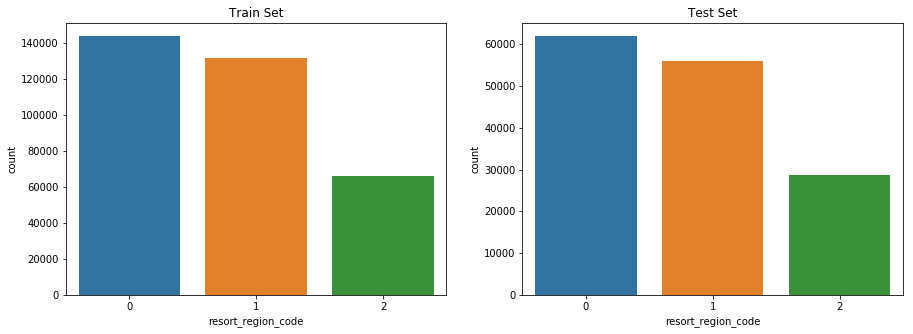

In [42]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['resort_region_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['resort_region_code'])
plt.title('Test Set')

### Resort Type Code

Text(0.5, 1.0, 'Test Set')

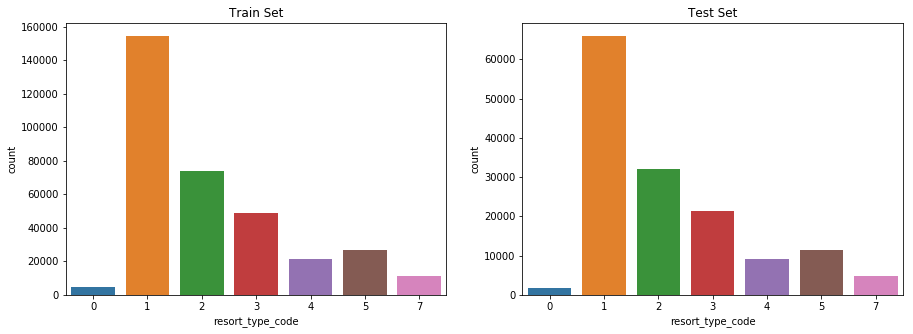

In [43]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['resort_type_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['resort_type_code'])
plt.title('Test Set')

LabelEncoding once more.

In [44]:
le = LabelEncoder()
le.fit(train['resort_type_code'])
for attribute in test['resort_type_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['resort_type_code'] = le.transform(train['resort_type_code'])
test['resort_type_code'] = le.transform(test['resort_type_code'])

Text(0.5, 1.0, 'Test Set')

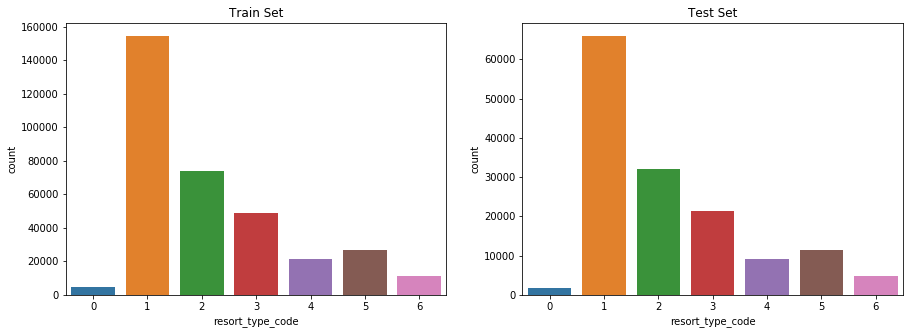

In [45]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['resort_type_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['resort_type_code'])
plt.title('Test Set')

### Room Type Booked Code

Text(0.5, 1.0, 'Test Set')

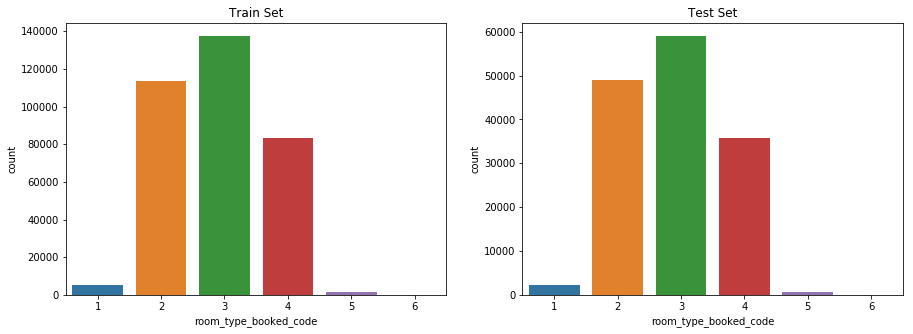

In [46]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['room_type_booked_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['room_type_booked_code'])
plt.title('Test Set')

The usual.

In [47]:
le = LabelEncoder()
le.fit(train['room_type_booked_code'])
for attribute in test['room_type_booked_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['room_type_booked_code'] = le.transform(train['room_type_booked_code'])
test['room_type_booked_code'] = le.transform(test['room_type_booked_code'])

Text(0.5, 1.0, 'Test Set')

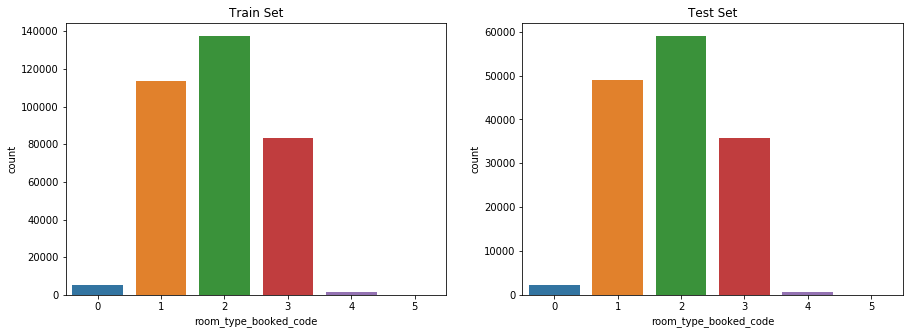

In [48]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['room_type_booked_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['room_type_booked_code'])
plt.title('Test Set')

### Room Nights

Text(0.5, 1.0, 'Test Set')

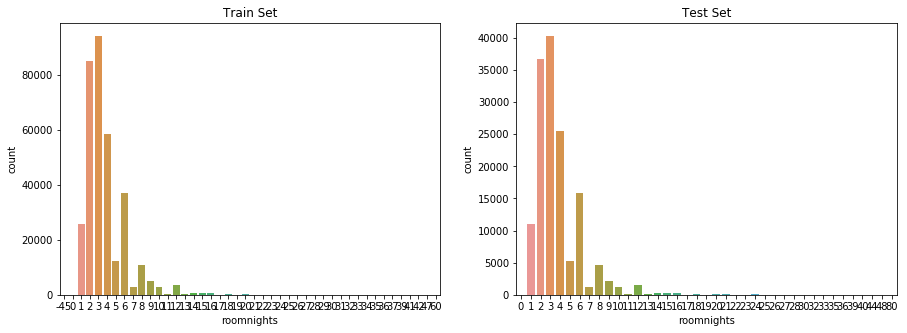

In [49]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['roomnights'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['roomnights'])
plt.title('Test Set')

In [50]:
train['roomnights'].value_counts()

 3     94256
 2     85105
 4     58487
 6     36932
 1     25777
 5     12303
 8     10716
 9      5107
 12     3546
 10     2912
 7      2883
 15      805
 16      592
 14      496
 11      322
 18      312
 20      215
 13      119
 21       93
 24       89
 17       59
 30       57
 28       50
 27       27
 19       27
 23       19
 22       15
 25       15
 36       12
 31       12
 26       11
 32        9
 35        8
 47        6
 29        5
 34        5
 37        5
 39        5
 42        4
 33        2
-45        1
 60        1
 41        1
 0         1
Name: roomnights, dtype: int64

Well this is certainly confusing. I first assumed this might be the same as the number of days stayed (the variable I found earlier from the checkin and checkout dates. But this is certainly not the same. Nobody ever booked more than 21 days there. So we need to investigate.

In [51]:
t = pd.read_csv('train.csv')
t[t['roomnights'] == 60]

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
104410,d6b48086b9ba5403d5103cb3587b933917cb4c87aa2c32...,07/04/15,15/05/15,25/05/15,3,1,8,0,45,1,...,15.0,4,2,D,1,5d66e978824908080c7f84afa15567bcc8a315ac3f2715...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...,9.290332


Oh. What's this? They checked in on 15/05/15 and checked out on 25/05/15. So how does it become 60 room nights? On checking the data dictionary, it turns out that this feature indicates the number of rooms _booked_ not actually utilized. So we can drop this column.

In [52]:
train.drop(['roomnights'], axis = 1, inplace = True)
test.drop(['roomnights'], axis = 1, inplace = True)

### Season Holidayed Code

Text(0.5, 1.0, 'Test Set')

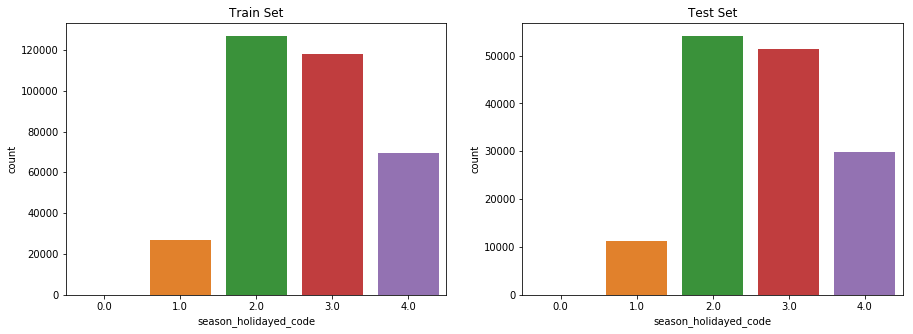

In [53]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['season_holidayed_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['season_holidayed_code'])
plt.title('Test Set')

In [54]:
le = LabelEncoder()
le.fit(train['season_holidayed_code'])
for attribute in test['season_holidayed_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['season_holidayed_code'] = le.transform(train['season_holidayed_code'])
test['season_holidayed_code'] = le.transform(test['season_holidayed_code'])

Text(0.5, 1.0, 'Test Set')

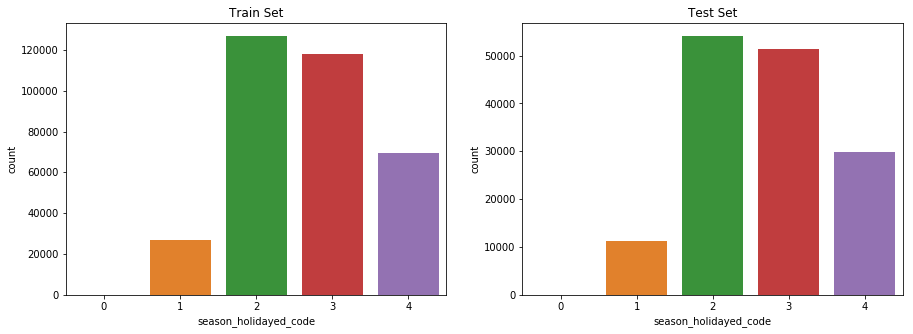

In [55]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['season_holidayed_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['season_holidayed_code'])
plt.title('Test Set')

### State Code Residence

Text(0.5, 1.0, 'Test Set')

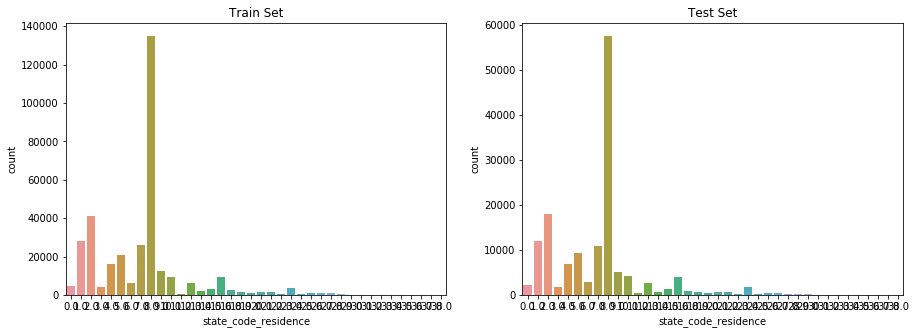

In [56]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['state_code_residence'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['state_code_residence'])
plt.title('Test Set')

In [57]:
le = LabelEncoder()
le.fit(train['state_code_residence'])
for attribute in test['state_code_residence'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['state_code_residence'] = le.transform(train['state_code_residence'])
test['state_code_residence'] = le.transform(test['state_code_residence'])

Text(0.5, 1.0, 'Test Set')

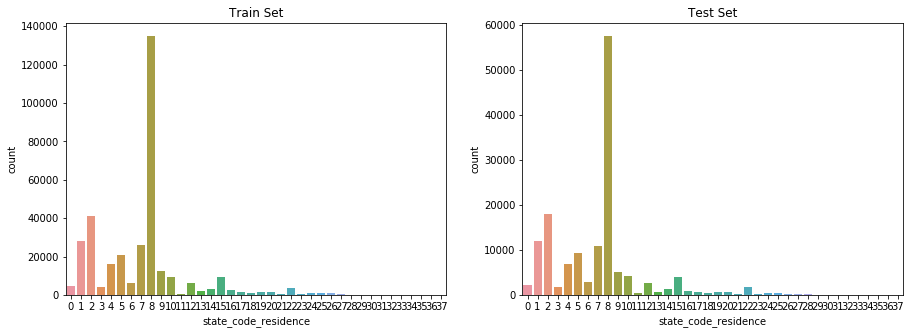

In [58]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['state_code_residence'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['state_code_residence'])
plt.title('Test Set')

### State Code Resort

Text(0.5, 1.0, 'Test Set')

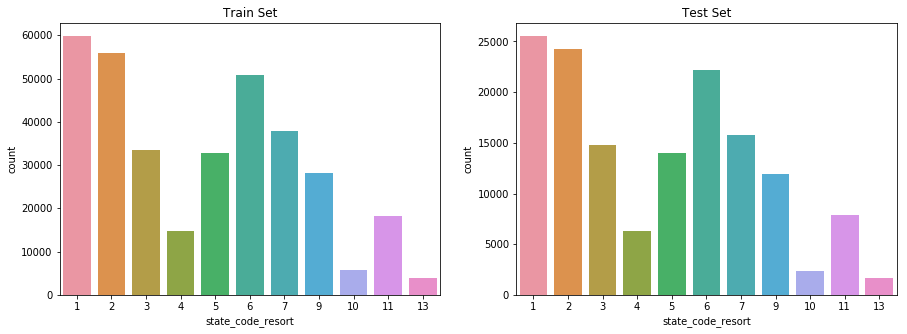

In [59]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['state_code_resort'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['state_code_resort'])
plt.title('Test Set')

In [60]:
le = LabelEncoder()
le.fit(train['state_code_resort'])
for attribute in test['state_code_resort'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['state_code_resort'] = le.transform(train['state_code_resort'])
test['state_code_resort'] = le.transform(test['state_code_resort'])

Text(0.5, 1.0, 'Test Set')

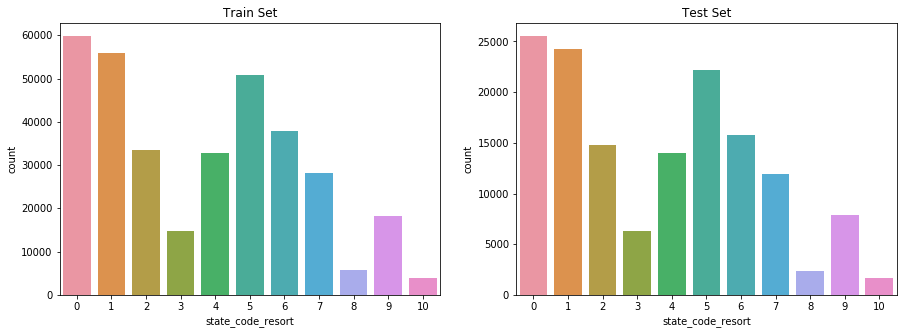

In [61]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['state_code_resort'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['state_code_resort'])
plt.title('Test Set')

### Member Age Buckets

Text(0.5, 1.0, 'Test Set')

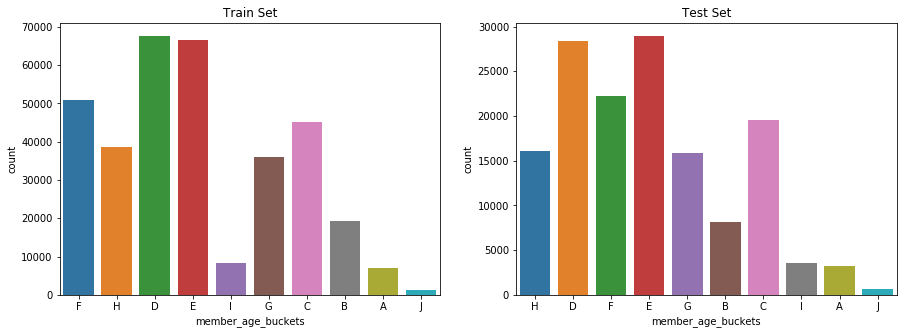

In [62]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['member_age_buckets'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['member_age_buckets'])
plt.title('Test Set')

In [63]:
le = LabelEncoder()
le.fit(train['member_age_buckets'])
for attribute in test['member_age_buckets'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['member_age_buckets'] = le.transform(train['member_age_buckets'])
test['member_age_buckets'] = le.transform(test['member_age_buckets'])

Text(0.5, 1.0, 'Test Set')

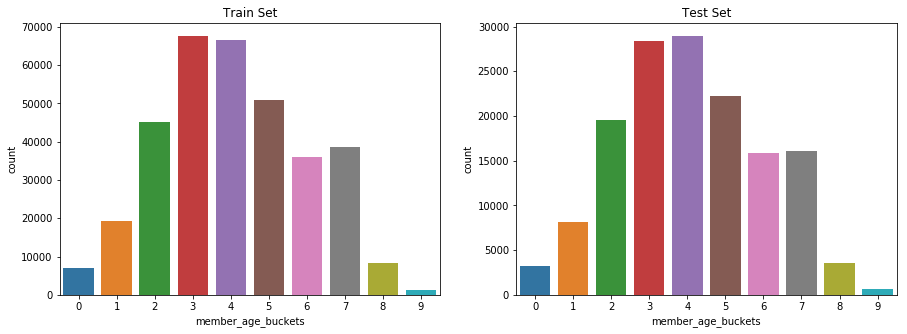

In [64]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['member_age_buckets'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['member_age_buckets'])
plt.title('Test Set')

### Booking Type Code

Text(0.5, 1.0, 'Test Set')

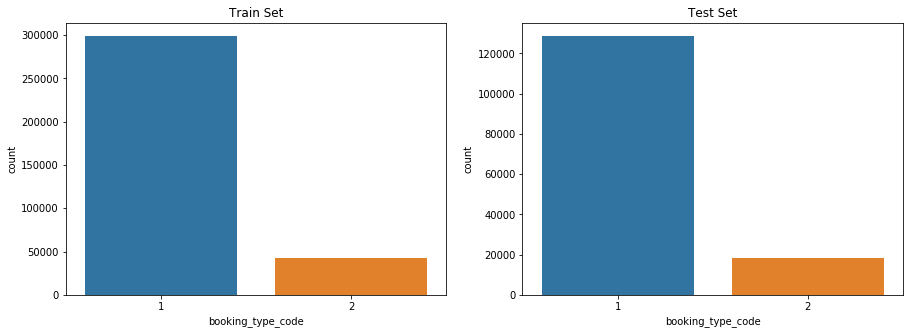

In [65]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['booking_type_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['booking_type_code'])
plt.title('Test Set')

In [66]:
le = LabelEncoder()
le.fit(train['booking_type_code'])
for attribute in test['booking_type_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['booking_type_code'] = le.transform(train['booking_type_code'])
test['booking_type_code'] = le.transform(test['booking_type_code'])

Text(0.5, 1.0, 'Test Set')

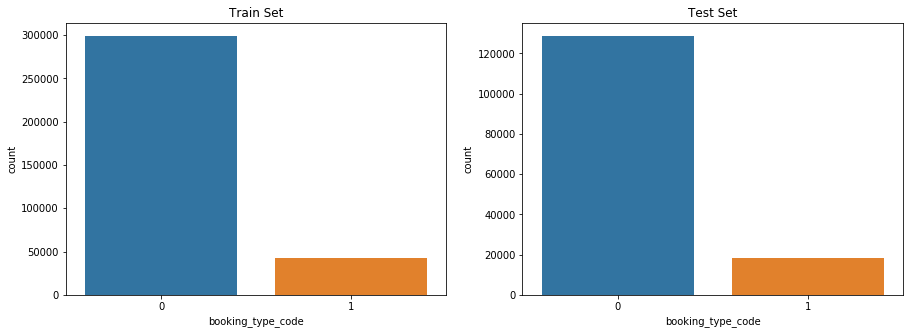

In [67]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['booking_type_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['booking_type_code'])
plt.title('Test Set')

### Member ID

In [68]:
train['memberid'].unique()

array(['3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5',
       '7b68caeb153ac83aeab0b9a679709c558d57a6c9d2bdf696ed73ba34ac10af11',
       '0fb5e9e87638ac401e88ea0115114182614151218a0147ceaffa0e4dec82353c',
       ...,
       'f393011a27daf3d1676417f48f44ad9ed3541285e71209181cbf9f5d5c3ef506',
       'b14649c29eb050f4e9b69c7a3afb5dfa00d12dabfd2e40fc965dc1b773cd6982',
       '2a3936f649eb6af2167f41fb6f0cc9f352d142125f402fb95783f664eb245189'],
      dtype=object)

This is just a list of unique Member IDs. So we can ignore and drop this.

In [69]:
train.drop(['memberid'], inplace = True, axis = 1)
test.drop(['memberid'], inplace = True, axis = 1)

### Cluster Code

Text(0.5, 1.0, 'Test Set')

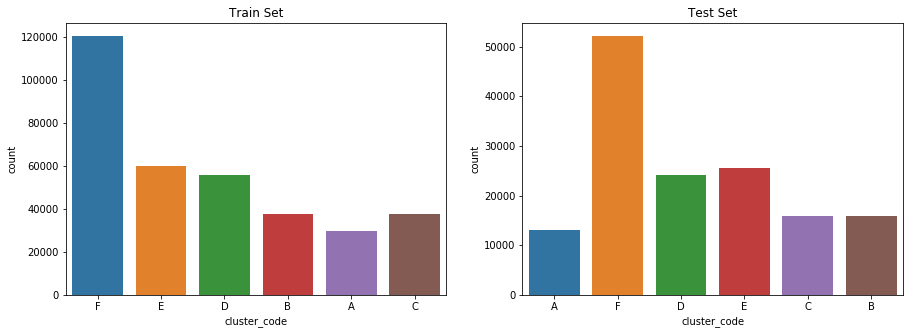

In [70]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['cluster_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['cluster_code'])
plt.title('Test Set')

In [71]:
le = LabelEncoder()
le.fit(train['cluster_code'])
for attribute in test['cluster_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['cluster_code'] = le.transform(train['cluster_code'])
test['cluster_code'] = le.transform(test['cluster_code'])

Text(0.5, 1.0, 'Test Set')

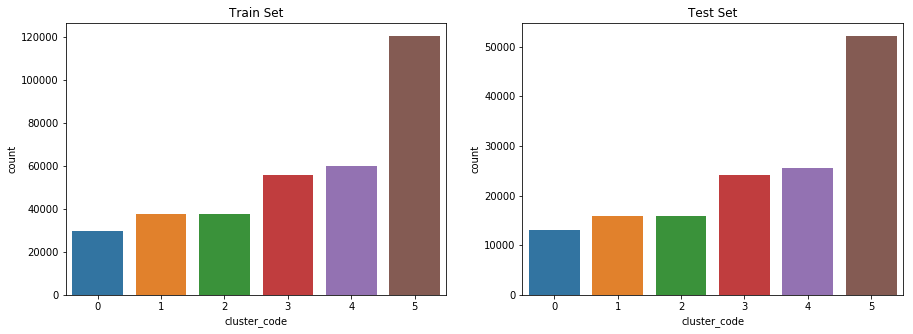

In [72]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['cluster_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['cluster_code'])
plt.title('Test Set')

### Reservation Status ID Code

Text(0.5, 1.0, 'Test Set')

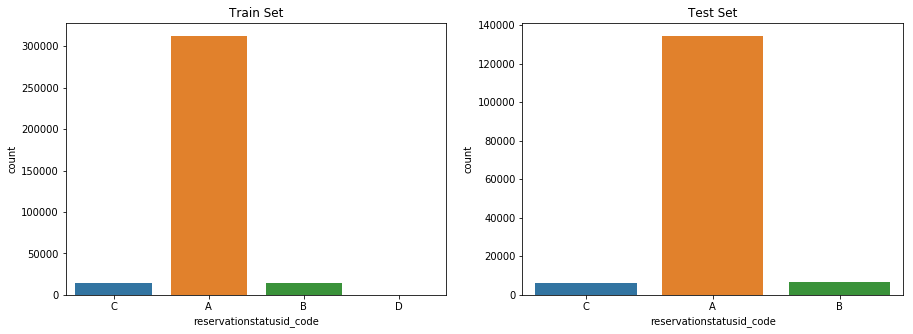

In [73]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['reservationstatusid_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['reservationstatusid_code'])
plt.title('Test Set')

In [74]:
le = LabelEncoder()
le.fit(train['reservationstatusid_code'])
for attribute in test['reservationstatusid_code'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['reservationstatusid_code'] = le.transform(train['reservationstatusid_code'])
test['reservationstatusid_code'] = le.transform(test['reservationstatusid_code'])

Text(0.5, 1.0, 'Test Set')

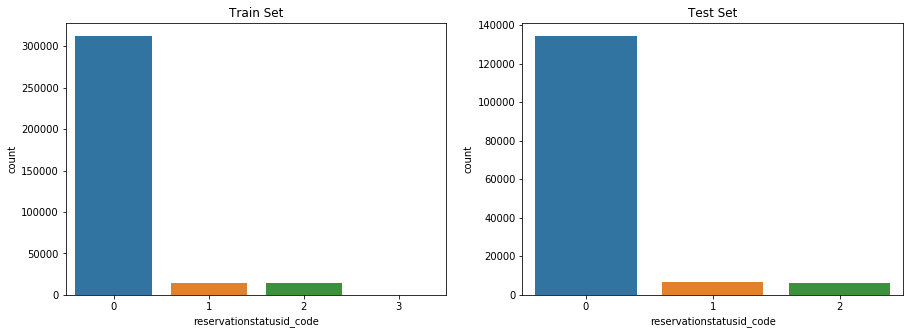

In [75]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['reservationstatusid_code'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['reservationstatusid_code'])
plt.title('Test Set')

### Resort ID

Text(0.5, 1.0, 'Test Set')

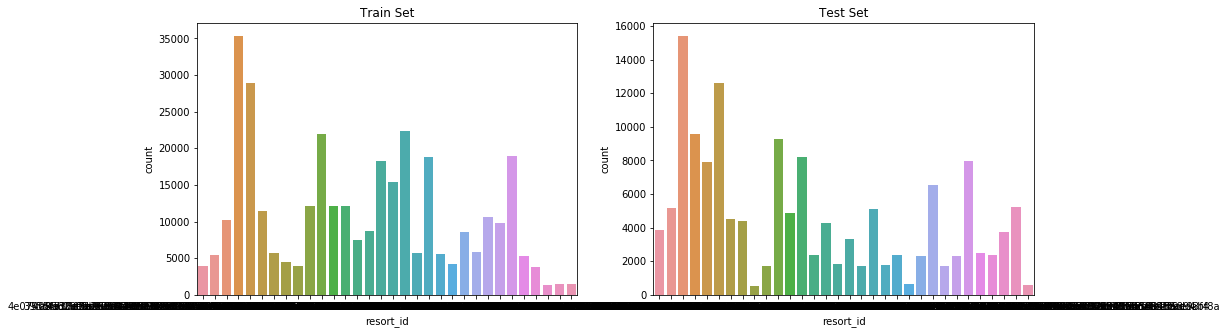

In [76]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['resort_id'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['resort_id'])
plt.title('Test Set')

In [77]:
le = LabelEncoder()
le.fit(train['resort_id'])
for attribute in test['resort_id'].unique().tolist():
    if attribute not in le.classes_:
        le.classes_ = np.append(le.classes_, values=attribute)
train['resort_id'] = le.transform(train['resort_id'])
test['resort_id'] = le.transform(test['resort_id'])

Text(0.5, 1.0, 'Test Set')

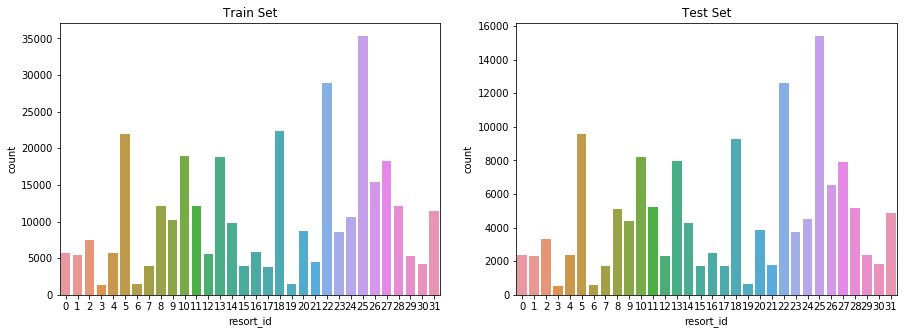

In [78]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.countplot(train['resort_id'])
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.countplot(test['resort_id'])
plt.title('Test Set')

### Amount Spent Per Room Night Scaled

c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


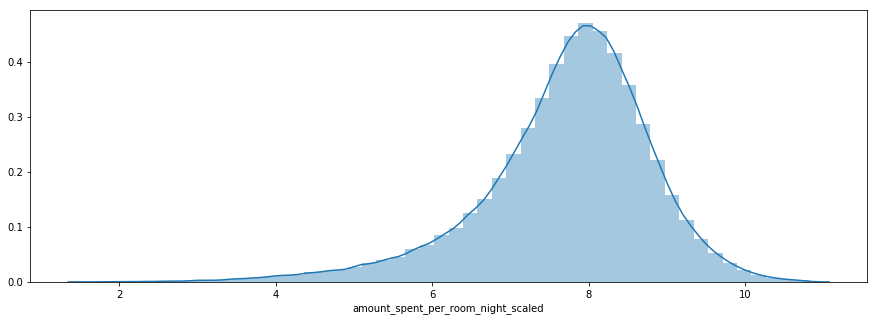

In [86]:
sns.distplot(train['amount_spent_per_room_night_scaled'])

## Conclusion

So this concludes the preliminary EDA. We can move on to the modelling now. Time left in the competition: 4 hours & 10 minutes.

In [80]:
train.to_csv('final/train_final.csv', index = False)
test.to_csv('final/test_final.csv', index = False)